The given function is

$f(x,y) = x^2 + 3y^2 + 2xy + x + 2y + 1$

We now use gradient descent to find the minima of this quadratic problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define the function to be minimized

def f(x, y):
    return x**2 + 3*y**2 + 2*x*y + x + 2*y + 1

In [3]:
# Define the partial derivatives of the function with respect to x and y

def df_dx(x, y):
    return 2*x + 2*y + 1

def df_dy(x, y):
    return 2*x + 6*y + 2

In [4]:
# Defining the norm function

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level

def tolerance(p):
    return 10 ** (-p)

In [5]:
# Define the gradient descent algorithm

def gradient_descent(start_x, start_y, learning_rate):

    # An array X and Y to store and display the tolerance vs iterations graph
    tablelist=[]

    for i in range (10):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(i)
        count = 0

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - learning_rate * grad_x
            y = y - learning_rate * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

        #To tabulate, tolerance, iterations, minima
        tablelist.append((10 ** (-i), count, f(x,y)))

        table_array = np.array(tablelist)

    # Printing the table
    print("The table for")
    print("Tolerance         iterations          minima")
    print(table_array)

    return x, y, f(x, y), history

In [6]:
# Define the meshgrid for plotting the function
x_range = np.arange(-5, 5, 0.1)
y_range = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform gradient descent and plot the results
start_x, start_y = -4, 2
learning_rate = 0.001
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate)


The table for
Tolerance         iterations          minima
[[1.00000000e+00 1.38500000e+03 1.05119251e+00]
 [1.00000000e-01 3.34900000e+03 6.29264202e-01]
 [1.00000000e-02 5.31300000e+03 6.25042665e-01]
 [1.00000000e-03 7.27800000e+03 6.25000426e-01]
 [1.00000000e-04 9.24200000e+03 6.25000004e-01]
 [1.00000000e-05 1.12060000e+04 6.25000000e-01]
 [1.00000000e-06 1.31700000e+04 6.25000000e-01]
 [1.00000000e-07 1.51350000e+04 6.25000000e-01]
 [1.00000000e-08 1.70990000e+04 6.25000000e-01]
 [1.00000000e-09 1.90630000e+04 6.25000000e-01]]


In [7]:
print(f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

0.625
Minimiser in x =  -0.2500000007880872
Minimiser in y =  -0.24999999967356357


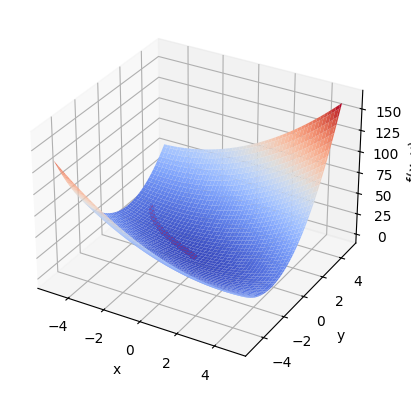

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

From the given function it is clear that the minimiser is at

$x_{min} = -0.250, y_{min} = -0.249$

And the minimum of the function at these two values are

$f(-0.250, -0.249) = 0.625$